Análisis Estadístico Multivariado

In [1]:
!pip install azure-storage==0.32.0

In [0]:
# Para realizar la importación de las librerías a utilizar para el análisis.
import pandas as pd
import numpy as np

# Para realizar las gráficas para facilitar el análisis visual.
import matplotlib.pyplot as plt
import seaborn as sns

# Uso de las librerías de azure.
from azure.storage.blob import BlockBlobService
from io import StringIO

In [0]:
# Para realizar la carga de los datos para la carga de los datos de la matriz de 
# usuarios creada en el análisis anterior.
azure_storage_account_name = "pintegrador"
azure_storage_account_key = "pK6fMmlQr7NMrM+TAMlgu9iUIJWNMEGBdOyiw0XiX1q1jbQEbLkX0+4/0DEhV794c32Riu+xpPv6ZcGOcC4i9g=="
azure_storage_container_name = "datos"
file_name = "data.csv"

#First, we need to connect to our blob via the BlobService
blob_service = BlockBlobService(azure_storage_account_name, azure_storage_account_key)
a = blob_service.get_blob_to_text(azure_storage_container_name,file_name)

In [4]:
df = pd.read_csv(StringIO(a.content), delimiter=",", encoding="utf-8")
df.head()

Unnamed: 0  IdUsuario  OH  DH    DP    AT   NV    seconds
0           0          2   1   1   219   372    5      331.0
1           1          8  49   3  1048   922   12  2287519.7
2           2          9   3   3  1316   555  237   110712.1
3           3         10  32   5   977  1023   52   790531.2
4           4         12   7   7  1255  1061  144   515739.8

In [5]:
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

IdUsuario  OH  DH    DP    AT   NV    seconds
0          2   1   1   219   372    5      331.0
1          8  49   3  1048   922   12  2287519.7
2          9   3   3  1316   555  237   110712.1
3         10  32   5   977  1023   52   790531.2
4         12   7   7  1255  1061  144   515739.8

In [6]:
len(df)

61554

In [7]:
df = df[df['seconds']>0]
len(df)

57677

In [8]:
df = df[np.isfinite(df['seconds'])]
len(df)

57677

In [9]:
df['seconds'] = df['seconds']/3600
df_2 = df
df['seconds'] = df['seconds']/2

# Para renombrar las variables.
df = df.rename(columns={'seconds':'TV'})
df.head(10)

IdUsuario  OH  DH    DP    AT   NV           TV
0          2   1   1   219   372    5     0.045972
1          8  49   3  1048   922   12   317.711069
2          9   3   3  1316   555  237    15.376681
3         10  32   5   977  1023   52   109.796000
4         12   7   7  1255  1061  144    71.630528
5         13  12  12  1436   820  132    58.778694
6         21   1   1  1570   939   22   423.918875
7         22  28  27   340   975    6  1180.712917
8         27   8  12   559  1045    2   383.733889
9         33   5  36  1175  1037   97   107.475083

In [0]:
#Funcion para calcular el CE
import math

def CoefExp(R,T,K = 1): #Constante K se utiliza para cambiar el periodo de tiempo
    
    X =  (2 / (1 + math.exp(- R / (K*T) ))) - 1
    
    return X

In [11]:
# Para realizar el cálculo del CE
CE = np.zeros(len(df))

for i in range (0, len(df)):
    R = df.iloc[i,5]
    T = df.iloc[i,6]
    CE[i] = CoefExp(R,T)
CE.mean()

0.46540178428927403

In [12]:
df['CE'] = CE
df.head(100)

IdUsuario  OH  DH    DP    AT   NV          TV        CE
0            2   1   1   219   372    5    0.045972  1.000000
1            8  49   3  1048   922   12  317.711069  0.018883
2            9   3   3  1316   555  237   15.376681  1.000000
3           10  32   5   977  1023   52  109.796000  0.232474
4           12   7   7  1255  1061  144   71.630528  0.763752
..         ...  ..  ..   ...   ...  ...         ...       ...
101        263  13  62  1099  1040   93  112.981167  0.389807
103        269  47  47   628  1041    5  891.679611  0.002804
104        270  49  49   810   287    3  659.278333  0.002275
106        272  33  32  1366   777   12  630.373819  0.009518
107        275  34  41  2165  1060   80  131.565944  0.294996

[100 rows x 8 columns]

# Analisis descriptivo 

In [13]:
df2 = df
df = df.drop(['IdUsuario'],axis = 1)
df.describe()

OH            DH  ...            TV            CE
count  57677.000000  57677.000000  ...  57677.000000  57677.000000
mean      30.523987     30.696621  ...    213.826975      0.465402
std       23.764542     23.840037  ...    534.927882      0.409550
min        1.000000      1.000000  ...      0.000278      0.000077
25%        8.000000      8.000000  ...     26.420792      0.049842
50%       23.000000     24.000000  ...     64.766514      0.348650
75%       49.000000     51.000000  ...    182.071292      0.969557
max       94.000000     94.000000  ...  13017.802917      1.000000

[8 rows x 7 columns]

In [14]:
len(df.OH.unique())

64

In [15]:
len(df.DH.unique())

64

# Dependencia entre variables variables independientes

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)
print(data.mean(axis=0))
print(data.std(axis=0))
dt = pd.DataFrame(data)

[-2.56242331e-17 -1.27782383e-16  8.13076626e-18  6.89883198e-17
 -6.40605827e-18  7.93365678e-17  1.79246438e-17]
[1. 1. 1. 1. 1. 1. 1.]


In [17]:
data = dt.drop(dt.columns[[6]], axis=1)
data

0         1         2         3         4         5
0     -1.242365 -1.245673 -0.253616 -1.314426 -0.576726 -0.399648
1      0.777468 -1.161779 -0.123834  0.529270 -0.540064  0.194204
2     -1.158206 -1.161779 -0.081878 -0.700978  0.638336 -0.370988
3      0.062110 -1.077886 -0.134949  0.867840 -0.330571 -0.194478
4     -0.989886 -0.993993 -0.091428  0.995222  0.151264 -0.265826
...         ...       ...       ...       ...       ...       ...
57672 -0.947806 -0.952046 -0.169860 -1.984861 -0.592438 -0.397559
57673  1.534906 -1.203726 -0.185672 -1.984861 -0.587200 -0.399312
57674  0.146270 -0.952046 -0.172992 -1.984861 -0.592438 -0.399621
57675  1.240347  1.061391 -0.240152 -1.984861 -0.592438 -0.389411
57676 -0.947806 -0.952046  0.009078 -1.984861 -0.581963 -0.398975

[57677 rows x 6 columns]

## Dependencia por pares

In [18]:
R = data.corr('pearson')
R

0         1         2         3         4         5
0  1.000000  0.363581 -0.019129 -0.046450 -0.003098 -0.062342
1  0.363581  1.000000 -0.020282 -0.025302  0.024954 -0.058167
2 -0.019129 -0.020282  1.000000  0.049064  0.106597 -0.008745
3 -0.046450 -0.025302  0.049064  1.000000  0.262925  0.134375
4 -0.003098  0.024954  0.106597  0.262925  1.000000 -0.187853
5 -0.062342 -0.058167 -0.008745  0.134375 -0.187853  1.000000

No hay correlacion significativa entre las variables

## Dependecia de cada variable y el resto: Regresión lineal múltiple

In [19]:
S = data.cov()
S

0         1         2         3         4         5
0  1.000017  0.363587 -0.019129 -0.046451 -0.003098 -0.062343
1  0.363587  1.000017 -0.020282 -0.025302  0.024955 -0.058168
2 -0.019129 -0.020282  1.000017  0.049065  0.106599 -0.008746
3 -0.046451 -0.025302  0.049065  1.000017  0.262930  0.134377
4 -0.003098  0.024955  0.106599  0.262930  1.000017 -0.187856
5 -0.062343 -0.058168 -0.008746  0.134377 -0.187856  1.000017

In [20]:
# Para tener una médida del tamaño y variabilidad a través de la traza y el det,
# y número condición.
print('Determinante: ', np.linalg.det(S), 'Traza:: ', np.diagonal(S).sum(), 
      'Rango', np.linalg.matrix_rank(S), 'número cond', np.linalg.cond(S))

Determinante:  0.7352508071541964 Traza::  6.000104029405644 Rango 6 número cond 2.333654269323438


La matriz de covarianza esta bien condicionada, por lo tanto es facilmente invertible y ante un cambio pequeño la matriz es poco sensible

In [21]:
CovInv = np.linalg.inv(S)
DD = np.diag(CovInv)*np.diag(S)
DD_inverso = DD**-1
print('Estos son los coeficientes de correlacion multiple entre cada variable y el resto:')
print('')
UNO_menos_DD_inverso = 1 - DD_inverso
print(UNO_menos_DD_inverso)

Estos son los coeficientes de correlacion multiple entre cada variable y el resto:

[0.13513822 0.13419265 0.01247653 0.10570789 0.12856324 0.07539242]


Las variable mas predecibles por el resto son los origen habituales (OH) y el destino habitual (DH) R2 = 0.135, es decir el resto de las variables explica el 13.5% de la variabilidad de esta variable. Un resultado interasante es que igualmente el numero de viajes en el que el 12% de la variabilidad de este se puede explicar por las demas variables

## Dependencia directa entre pares: Correlaciones parciales 

In [0]:
def correlacionesParciales(x):
    """
    funcion para calcular las correlaciones entre pares de variables
    """
    SdiaINV = np.diag(np.linalg.inv(S))**-0.5 #son las varianzas poblacionales
    matriz_D = np.diag(SdiaINV,0) #matriz cuadrada diagonal cuya diagonal es Sdia
    intermedio = matriz_D.dot(np.linalg.inv(S))
    CorrelP = -1*intermedio.dot(matriz_D)
    return CorrelP

In [23]:
correlacionesParciales(data).round(2)

array([[-1.  ,  0.36, -0.01, -0.03, -0.01, -0.04],
       [ 0.36, -1.  , -0.02, -0.01,  0.02, -0.03],
       [-0.01, -0.02, -1.  ,  0.02,  0.1 ,  0.01],
       [-0.03, -0.01,  0.02, -1.  ,  0.29,  0.19],
       [-0.01,  0.02,  0.1 ,  0.29, -1.  , -0.23],
       [-0.04, -0.03,  0.01,  0.19, -0.23, -1.  ]])

Aun si se elimina el efecto de las demas variables, estas no se explican entre si apesar que el origen y el destino parece ser que se explican en un 36% de la varianza entre ellas

## Coeficiente de dependencia

In [24]:
Det = np.linalg.det(R)
f = (len(R)-1)
D = 1 - Det**(1/f)
D

0.05967481913618877

Se concluye que globalmente, la dependencia lineal explica tan solo el 5,97% de la variabilidad de este conjunto de datos. Es decir que la dependencia entre nuestras variables no aporta variabilidad al comportamiento de los usuarios

## Analisis de componentes principales

In [0]:
Autovalores, Autovectores = np.linalg.eig(S)

In [26]:
#Variabilidad explicada por cada autovalor
Autovalores/np.trace(S)

array([0.10605123, 0.10016533, 0.1600329 , 0.1814011 , 0.23375124,
       0.2185982 ])

In [27]:
Autovectores = Autovectores.T
Autovectores

array([[ 0.69829064, -0.69641202,  0.00172873,  0.12458466, -0.07678445,
        -0.07733241],
       [ 0.11355365, -0.1123668 , -0.08976972, -0.56710327,  0.63623548,
         0.4899173 ],
       [-0.07289566, -0.03870039, -0.93223435,  0.22952276,  0.20825304,
        -0.1675637 ],
       [-0.22560028, -0.24787898,  0.07329991, -0.51256472,  0.14560356,
        -0.77354034],
       [ 0.66390309,  0.65601557, -0.08894174, -0.22422726, -0.01047492,
        -0.26566529],
       [-0.05019141, -0.09531982, -0.33104987, -0.54515264, -0.72431285,
         0.23870575]])

Text(0, 0.5, 'Principal component 2')

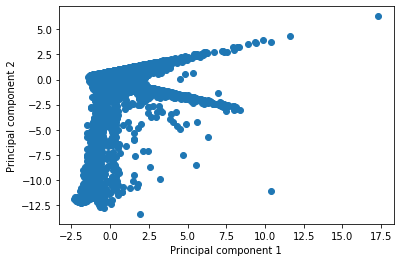

In [28]:
#Graficar los componentes principales
Comp1 = np.sum(Autovectores[1, :]*data, axis = 1)
Comp2 = np.sum(Autovectores[2, :]*data, axis = 1)
plt.scatter(Comp1, Comp2)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [30]:
finalCP = pd.concat([principalDf, df['CE']], axis = 1)
finalCP.head()

principal component 1  principal component 2        CE
0               1.212490              -1.303947  1.000000
1               0.399581              -0.261714  0.018883
2               1.274749              -0.027207  1.000000
3               0.793337               0.135790  0.232474
4               1.455251               0.540866  0.763752

In [31]:
CP = finalCP.head(100).round(3)
len(CP.CE.unique())

74

In [32]:
#Numero de condicion de la matriz
NC = np.linalg.cond(S)
NC

2.333654269323438

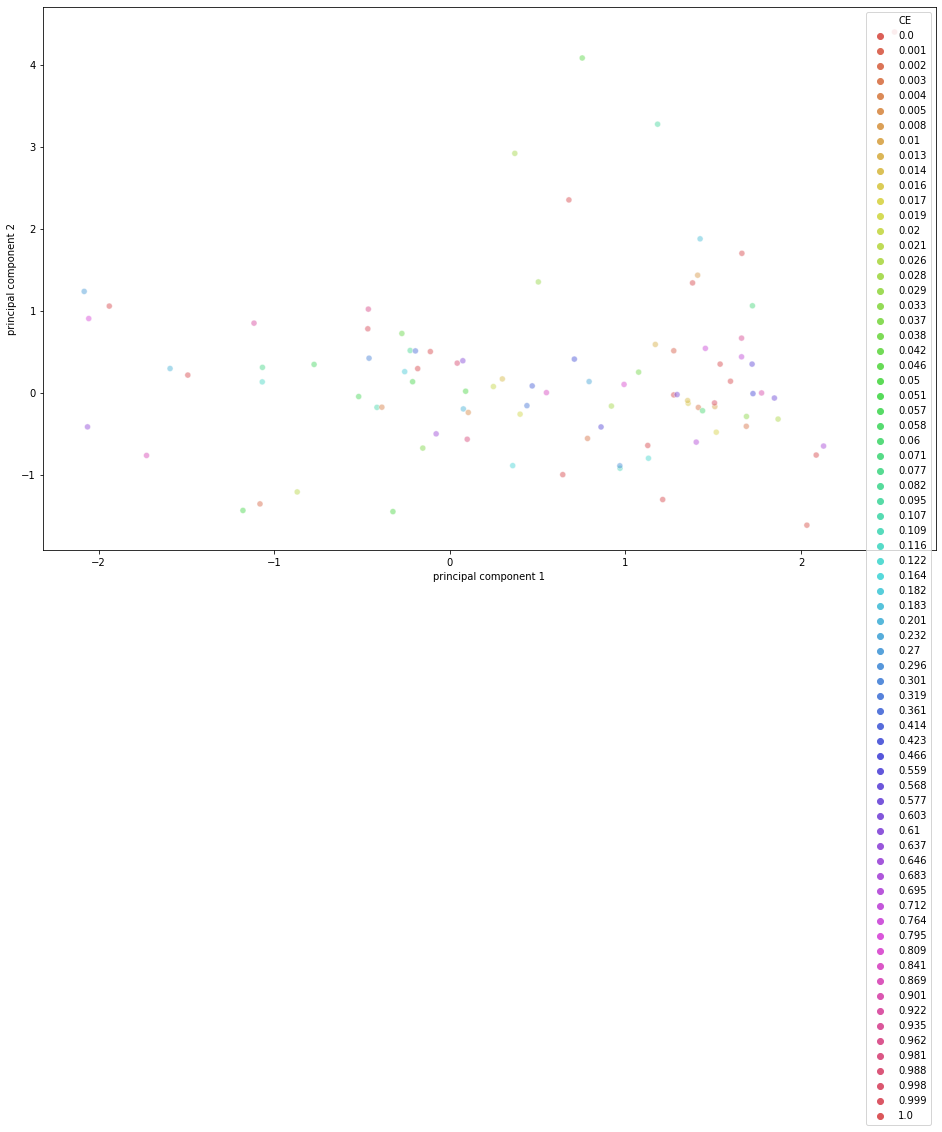

In [33]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="CE",
    palette = sns.color_palette("hls", n_colors = len(CP.CE.unique())-1),
    data = CP,
    legend="full",
    alpha=0.5
)

Como se puede observar los dos primeros componentes no alcanzan a explicar la variabilidad de la salida CE, ya que no se pude observar una tendencia entre el comportamiento de los componentes principales y la variable de salida CE

In [34]:
pca.explained_variance_ratio_

array([0.23375124, 0.2185982 ])

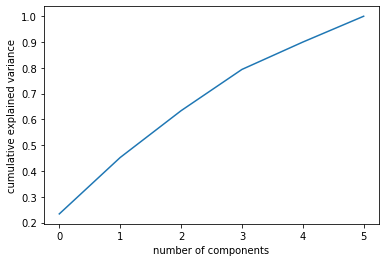

In [35]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

No se debe realizar una reduccion de variables ya que como se puede ver para explicar el 90% de la variabilidad se hace necesario utilizar 4 componentes principales.